<a href="https://colab.research.google.com/github/aflam330/Google_colab_coding-/blob/main/CSE420_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Md Abdun Fattah Lam (2220014)
     CSE420 (Section 1)
     Serial 18
     Assignment 1 - Autumn 2025
Task:
1. Create Histogram Manually (without using the python library)
2. Histogram Matching (with slide 19).
3. What is the type of image you selected (according to slide 19) and why?
4. Apply histogram matching (slide 23-24).

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
from PIL import Image

In [ ]:
#Mount
from google.colab import drive
drive.mount('/content/drive')

# Image Path in my drive
image_path = '/content/drive/MyDrive/CSE420/Assignment_2/sample_img/lam.jpg'
save_output = '/content/drive/MyDrive/CSE420/Assignment_2/output_img'
os.makedirs(save_output, exist_ok=True)
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
print("Saving outputs to:", save_output)
# plt.imshow(img)
# plt.title("lam.jpg")
# plt.axis('off')
# plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Saving outputs to: /content/drive/MyDrive/CSE420/Assignment_2/output_img


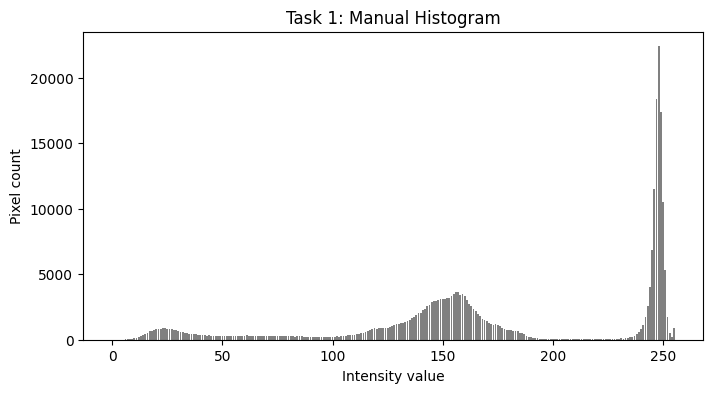

In [ ]:
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Create histogram manually
hist = np.zeros(256, dtype=int)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        intensity = img[i, j]
        hist[intensity] += 1

plt.figure(figsize=(8,4))
plt.bar(range(256), hist, color='gray')
plt.title("Task 1: Manual Histogram")
plt.xlabel("Intensity value")
plt.ylabel("Pixel count")
plt.show()


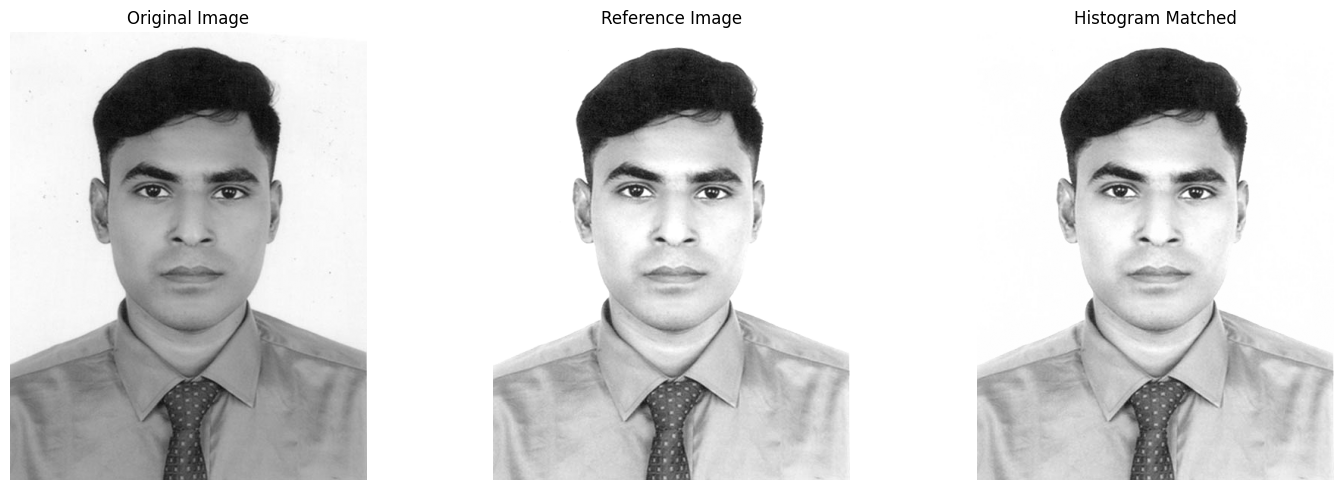

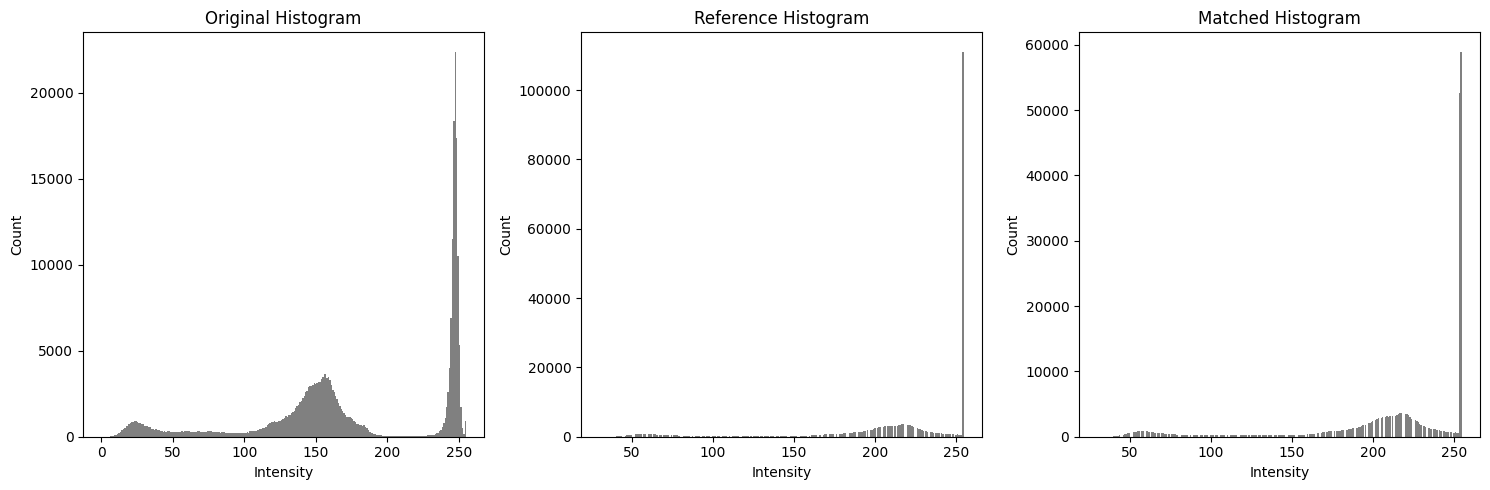

In [ ]:
reference = cv2.convertScaleAbs(img, alpha=1.2, beta=30)  # increase contrast and brightness

# Histogram matching manually
def match_histogram(source, reference):
    src_hist, _ = np.histogram(source.flatten(), 256, [0,256])
    ref_hist, _ = np.histogram(reference.flatten(), 256, [0,256])

    # Compute CDFs
    src_cdf = np.cumsum(src_hist) / np.sum(src_hist)
    ref_cdf = np.cumsum(ref_hist) / np.sum(ref_hist)

    # Create mapping
    mapping = np.zeros(256)
    for i in range(256):
        diff = np.abs(ref_cdf - src_cdf[i])
        mapping[i] = np.argmin(diff)

    # Apply mapping
    matched = np.interp(source.flatten(), np.arange(256), mapping)
    return matched.reshape(source.shape).astype('uint8')

matched_img = match_histogram(img, reference)

# Visualize & Save Images
plt.figure(figsize=(15,5))
plt.subplot(1,3,1); plt.imshow(img, cmap='gray'); plt.title("Original Image"); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(reference, cmap='gray'); plt.title("Reference Image"); plt.axis('off')
plt.subplot(1,3,3); plt.imshow(matched_img, cmap='gray'); plt.title("Histogram Matched"); plt.axis('off')
plt.tight_layout()
plt.savefig(os.path.join(save_output, 'matched_images_comparison.png'))
plt.show()

# Save image separately
cv2.imwrite(os.path.join(save_output, 'original_image.png'), img)
cv2.imwrite(os.path.join(save_output, 'reference_image.png'), reference)
cv2.imwrite(os.path.join(save_output, 'matched_image.png'), matched_img)

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.hist(img.flatten(), bins=256, color='gray')
plt.title("Original Histogram")
plt.xlabel("Intensity"); plt.ylabel("Count")

plt.subplot(1,3,2)
plt.hist(reference.flatten(), bins=256, color='gray')
plt.title("Reference Histogram")
plt.xlabel("Intensity"); plt.ylabel("Count")

plt.subplot(1,3,3)
plt.hist(matched_img.flatten(), bins=256, color='gray')
plt.title("Matched Histogram")
plt.xlabel("Intensity"); plt.ylabel("Count")

plt.tight_layout()
hist_path = os.path.join(save_output, 'histogram_comparison.png')
plt.savefig(hist_path)
plt.show()



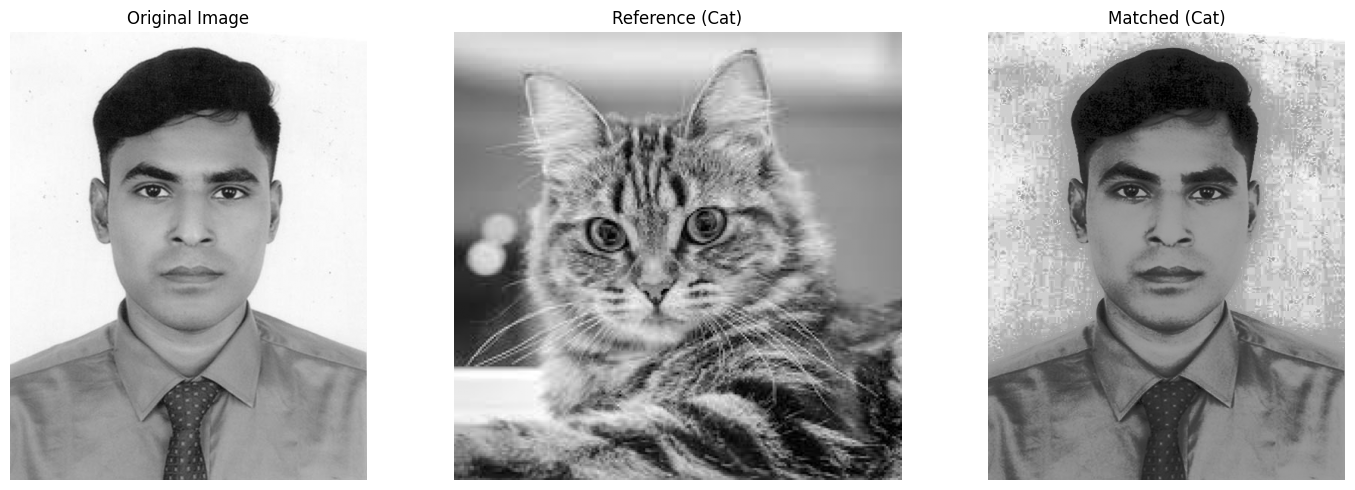

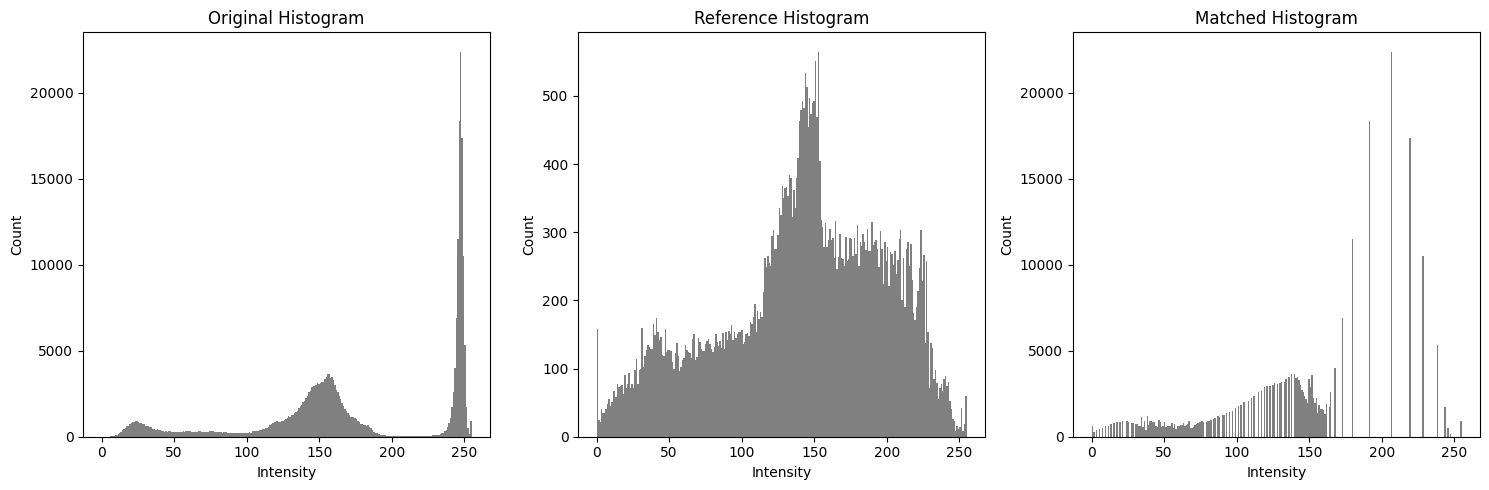

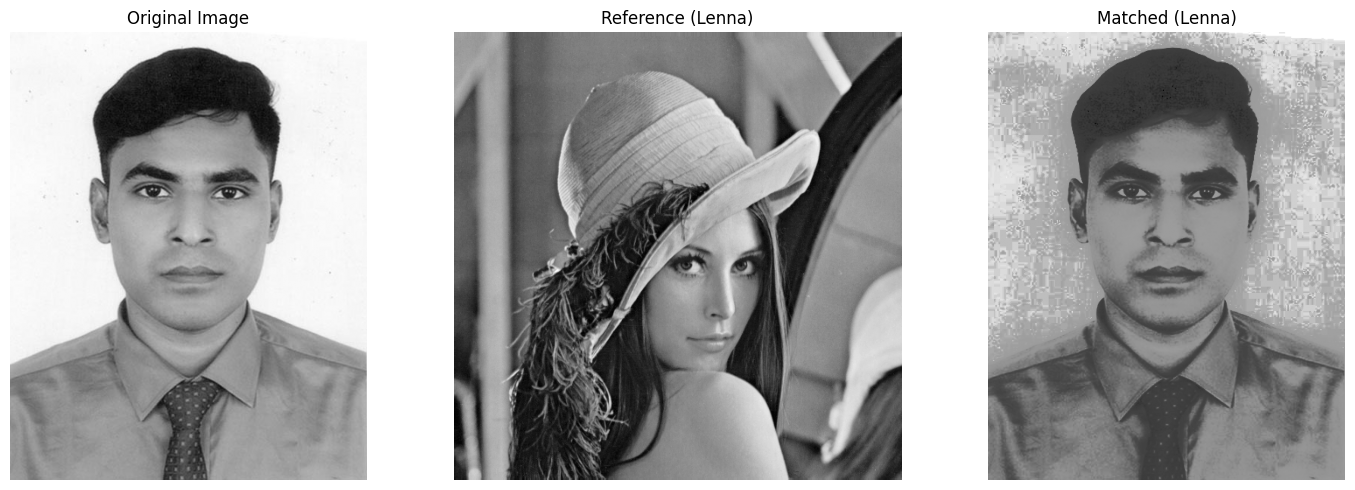

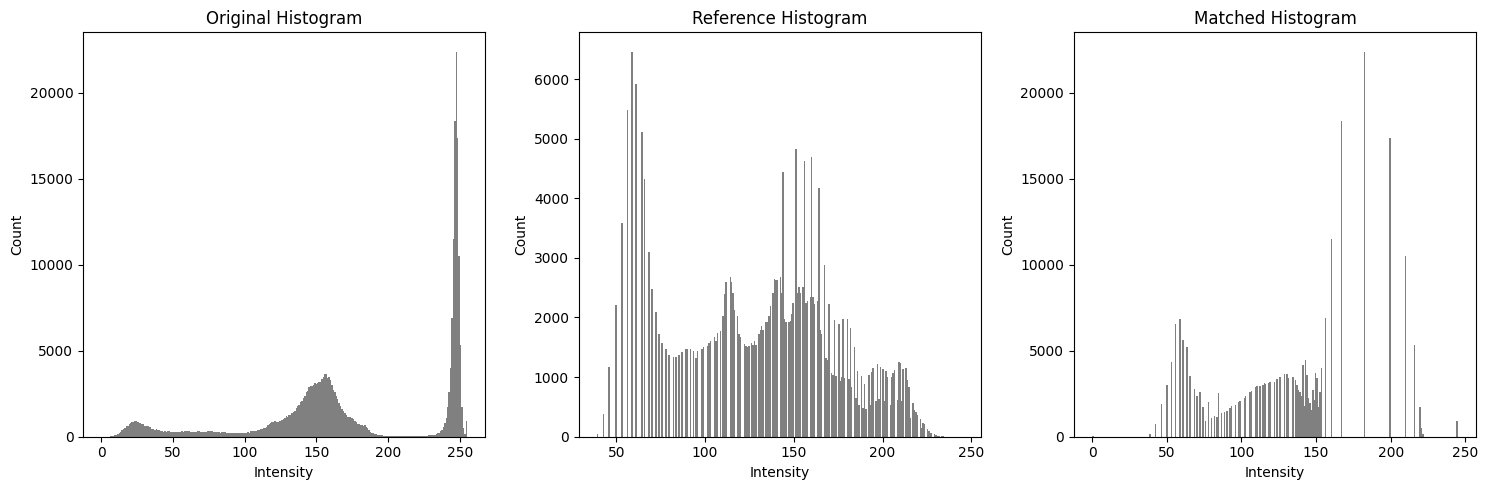

In [ ]:
# Histogram Matching Function
def match_histogram(source, reference):
    src_hist, _ = np.histogram(source.flatten(), 256, [0,256])
    ref_hist, _ = np.histogram(reference.flatten(), 256, [0,256])

    # Compute CDFs
    src_cdf = np.cumsum(src_hist) / np.sum(src_hist)
    ref_cdf = np.cumsum(ref_hist) / np.sum(ref_hist)

    # Create mapping
    mapping = np.zeros(256)
    for i in range(256):
        diff = np.abs(ref_cdf - src_cdf[i])
        mapping[i] = np.argmin(diff)

    # Apply mapping
    matched = np.interp(source.flatten(), np.arange(256), mapping)
    return matched.reshape(source.shape).astype('uint8')

# Histogram Plot Function (with save)
def plot_histograms(original, reference, matched, save_path):
    plt.figure(figsize=(15,5))
    plt.subplot(1,3,1)
    plt.hist(original.flatten(), bins=256, color='gray')
    plt.title("Original Histogram")
    plt.xlabel("Intensity"); plt.ylabel("Count")

    plt.subplot(1,3,2)
    plt.hist(reference.flatten(), bins=256, color='gray')
    plt.title("Reference Histogram")
    plt.xlabel("Intensity"); plt.ylabel("Count")

    plt.subplot(1,3,3)
    plt.hist(matched.flatten(), bins=256, color='gray')
    plt.title("Matched Histogram")
    plt.xlabel("Intensity"); plt.ylabel("Count")

    plt.tight_layout()
    plt.savefig(save_path)
    plt.show()

# Histogram Matching with cat.jpg
ref_image_path = '/content/drive/MyDrive/CSE420/Assignment_2/sample_img/cat.jpg'
ref_img = cv2.imread(ref_image_path, cv2.IMREAD_GRAYSCALE)
matched_img = match_histogram(img, ref_img)

# Show & Save combined comparison
plt.figure(figsize=(15,5))
plt.subplot(1,3,1); plt.imshow(img, cmap='gray'); plt.title("Original Image"); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(ref_img, cmap='gray'); plt.title("Reference (Cat)"); plt.axis('off')
plt.subplot(1,3,3); plt.imshow(matched_img, cmap='gray'); plt.title("Matched (Cat)"); plt.axis('off')
plt.tight_layout()
plt.savefig(os.path.join(save_output, 'cat_comparison.png'))
plt.show()

# Save individual images
cv2.imwrite(os.path.join(save_output, 'original_image.png'), img)
cv2.imwrite(os.path.join(save_output, 'reference_cat.png'), ref_img)
cv2.imwrite(os.path.join(save_output, 'matched_cat.png'), matched_img)
# Save histogram plots
plot_histograms(img, ref_img, matched_img, os.path.join(save_output, 'cat_histograms.png'))

# Histogram Matching with lenna.png
ref_image_path2 = '/content/drive/MyDrive/CSE420/Assignment_2/sample_img/lenna.png'
ref_img2 = cv2.imread(ref_image_path2, cv2.IMREAD_GRAYSCALE)
matched_img2 = match_histogram(img, ref_img2)

# Show & Save combined comparison
plt.figure(figsize=(15,5))
plt.subplot(1,3,1); plt.imshow(img, cmap='gray'); plt.title("Original Image"); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(ref_img2, cmap='gray'); plt.title("Reference (Lenna)"); plt.axis('off')
plt.subplot(1,3,3); plt.imshow(matched_img2, cmap='gray'); plt.title("Matched (Lenna)"); plt.axis('off')
plt.tight_layout()
plt.savefig(os.path.join(save_output, 'lenna_comparison.png'))
plt.show()


# Save individual images
cv2.imwrite(os.path.join(save_output, 'reference_lenna.png'), ref_img2)
cv2.imwrite(os.path.join(save_output, 'matched_lenna.png'), matched_img2)
# Save histogram plots
plot_histograms(img, ref_img2, matched_img2, os.path.join(save_output, 'lenna_histograms.png'))

